<a href="https://colab.research.google.com/github/felixpei/pycodesnip/blob/main/EDA01_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 小專題，鳶尾花分析與分析結果展示

In [ ]:
!pip install -q streamlit==0.83
!pip install -q pyngrok==5.0.5


     |████████████████████████████████| 7.8MB 4.8MB/s 
     |████████████████████████████████| 112kB 45.9MB/s 
     |████████████████████████████████| 174kB 44.0MB/s 
     |████████████████████████████████| 4.2MB 35.7MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 122kB 56.8MB/s 
     |████████████████████████████████| 788kB 43.7MB/s 
     |████████████████████████████████| 368kB 36.0MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
     |████████████████████████████████| 747kB 6.7MB/s 


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt
from pyngrok import ngrok
import os


## 在Jupyter notenook上進行資料分析

### 獲取資料

In [ ]:
# from sklearn.datasets import load_iris
iris = load_iris()

### 資料overview

In [ ]:
#　鳶尾花的種類
print(iris.target_names)

# 花朵的特徵
print(iris.feature_names)



['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# import pandas as pd 
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
print(len(data),'筆資料\n')
data.loc[:, 'sepal length (cm)']

150 筆資料



0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

### 產生並儲存圖表

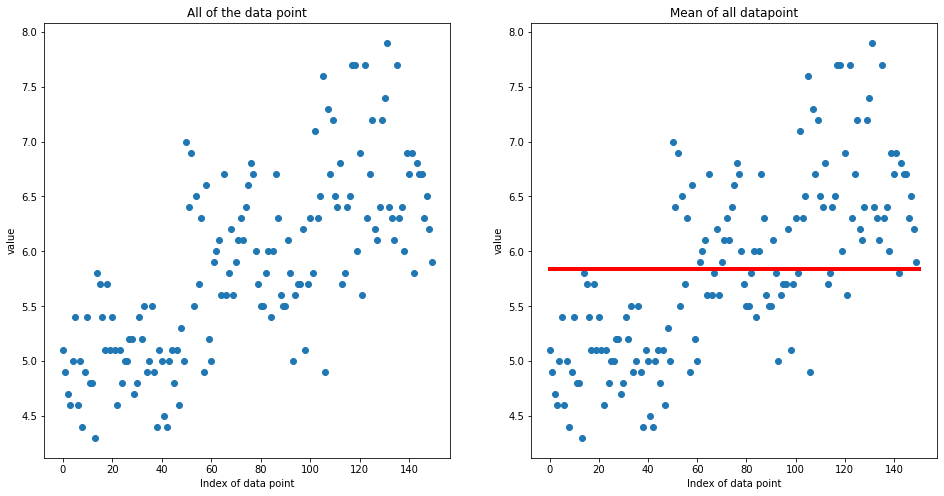

In [ ]:

tmp = data.loc[:, 'sepal length (cm)']


fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(x = range(len(tmp)), y = tmp)
plt.title('All of the data point'), plt.xlabel('Index of data point'), plt.ylabel('value')

plt.subplot(1,2,2)

ax = [0, len(tmp)]
ay = [tmp.mean()]*2

plt.scatter(x = range(len(tmp)), y = tmp)
plt.plot(ax, ay, linewidth=4, color='red')
plt.title('Mean of all datapoint'), plt.xlabel('Index of data point'), plt.ylabel('value')

plt.savefig("simple_datapoint.png")
# # plt.scatter(x = range(len(tmp)), y = [tmp.mean()]*len(tmp), )
plt.show()

## streamlit web-api 設計
### 產出app.py

In [ ]:
%%writefile app.py
import streamlit as st
import matplotlib.pyplot as plt


st.title('This is a simple_datapoint scatter')

st.image('simple_datapoint.png')

# 產生app.py

Writing app.py


### ngrol方法建立

In [ ]:
from pyngrok import ngrok
def run_webApi():

  os.system('killall ngrok')
  print('Clear existed ngrok.')
  print('Run ngrok.')
  
  public_url = ngrok.connect(port='80')
  public_url = str(public_url).split(sep='"')[1]
  print('頁面連結', public_url)
  os.system('streamlit run --server.port 80 app.py >/dev/null')

  


### 透過ngrok廣播colab port，執行streamlit Web-API

In [ ]:
if __name__ == '__main__':
  run_webApi()

Clear existed ngrok.
Run ngrok.
頁面連結 http://267ebb47b47a.ngrok.io
